In [1]:
import laser_measurement.measurement as measurement
import monitor.monitor as monitor
import threading
import time

# 串口参数
port = '/dev/ttyUSB0'  # 串口设备路径

# 打开串口
ser = measurement.measure(port) 
monitor = monitor.monitor()

#初始化激光器
ser.init_write(20)
ser.mode = "singgel"

def mov():
    while 1:
        monitor.del_move_x()
        # monitor.get_position()
        time.sleep(1/20)
        # t2.join()
    
def measure():
    while 1:
        ser.read_serial()
        time.sleep(1/20)
        # t1.join()
        
# 创建线程
t1=threading.Thread(target=mov,daemon=True)
t2=threading.Thread(target=measure,daemon=True)

t1.start()
t2.start()
t2.join()
t1.join()
erro = monitor.DAQdll.CloseUSB_2XE()
ser.stop_serial()



OK

D=2.134m,115#
D=2.844m,262#
D=2.795m,89#
D=2.783m,595#
D=2.783m,639#
D=2.784m,638#
D=2.785m,585#
D=2.786m,644#
D=2.787m,647#
D=2.788m,756#
D=2.789m,724#
D=2.790m,696#
D=2.791m,667#


KeyboardInterrupt: 

In [2]:
a=[1,2,3]
a.pop(0)
a

[2, 3]

In [18]:
x=['D=1.814m\r\n', 'D=1.810m\r\n', 'D=1.807m\r\n', 'D=1.811m\r\n', 'D=1.802m\r\n', 'D=1.805m\r\n', 'D=1.810m\r\n', 'D=1.810m\r\n', 'D=1.810m\r\n', 'D=1.811m\r\n', 'D=1.814m\r\n', 'D=1.815m\r\n', 'D=1.817m\r\n', 'D=1.817m\r\n', 'D=1.817m\r\n', 'STOP\r\n', 'OK\r\n', 'STOP\r\n', 'OK\r\n', 'D=1.797m\r\n', 'D=1.801m\r\n', 'D=1.801m\r\n', 'D=1.801m\r\n', 'D=1.812m\r\n', 'D=1.805m\r\n', 'D=1.810m\r\n', 'D=1.806m\r\n', 'D=1.816m\r\n', 'D=1.819m\r\n', 'D=1.813m\r\n', 'D=1.813m\r\n', 'D=1.813m\r\n', 'D=1.821m\r\n', 'D=1.818m\r\n', 'STOP\r\n', 'OK\r\n', 'STOP\r\n', 'OK\r\n', 'D=1.794m\r\n', 'D=1.805m\r\n', 'D=1.802m\r\n', 'D=1.799m\r\n', 'D=1.808m\r\n', 'D=1.807m\r\n', 'D=1.813m\r\n', 'D=1.811m\r\n', 'D=1.815m\r\n', 'D=1.815m\r\n', 'D=1.811m\r\n', 'D=1.823m\r\n', 'D=1.828m\r\n', 'D=1.828m\r\n', 'D=1.826m\r\n']

lst = [[]]
x_len=len(x)
line_num=0
for i in range(x_len):
    if x:
        a=x.pop(0)
        # print(a,line_num)
        lst[line_num].append(a)
        if a=='OK\r\n' and x[1][0]=="D":
            line_num+=1
            lst.append([])

[['D=1.814m\r\n', 'D=1.810m\r\n', 'D=1.807m\r\n', 'D=1.811m\r\n', 'D=1.802m\r\n', 'D=1.805m\r\n', 'D=1.810m\r\n', 'D=1.810m\r\n', 'D=1.810m\r\n', 'D=1.811m\r\n', 'D=1.814m\r\n', 'D=1.815m\r\n', 'D=1.817m\r\n', 'D=1.817m\r\n', 'D=1.817m\r\n', 'STOP\r\n', 'OK\r\n', 'STOP\r\n', 'OK\r\n'], ['D=1.797m\r\n', 'D=1.801m\r\n', 'D=1.801m\r\n', 'D=1.801m\r\n', 'D=1.812m\r\n', 'D=1.805m\r\n', 'D=1.810m\r\n', 'D=1.806m\r\n', 'D=1.816m\r\n', 'D=1.819m\r\n', 'D=1.813m\r\n', 'D=1.813m\r\n', 'D=1.813m\r\n', 'D=1.821m\r\n', 'D=1.818m\r\n', 'STOP\r\n', 'OK\r\n', 'STOP\r\n', 'OK\r\n'], ['D=1.794m\r\n', 'D=1.805m\r\n', 'D=1.802m\r\n', 'D=1.799m\r\n', 'D=1.808m\r\n', 'D=1.807m\r\n', 'D=1.813m\r\n', 'D=1.811m\r\n', 'D=1.815m\r\n', 'D=1.815m\r\n', 'D=1.811m\r\n', 'D=1.823m\r\n', 'D=1.828m\r\n', 'D=1.828m\r\n', 'D=1.826m\r\n']]


In [28]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create 3D array
lst = [[[1,2,3,4,5],[4,5,6,7,8]],[[1,2,3,4],[4,5,6,7]]]
max_datalen = len(max(lst[0],key=len))
for i in range(len(lst)):
    lst_len=len(lst[i][0])
    supplement_len = max_datalen - lst_len
    if supplement_len:
        split_len=int(lst_len/(supplement_len+1))
    
    for j in range(supplement_len):
        lst[i][0].insert(split_len*(j+1),lst[i][0][split_len*(j+1)-1])
        lst[i][1].insert(split_len*(j+1),lst[i][1][split_len*(j+1)-1])
print(lst)

[[[1, 2, 3, 4, 5], [4, 5, 6, 7, 8]], [[1, 2, 2, 3, 4], [4, 5, 5, 6, 7]]]


/tmp/ipykernel_4896/3507478828.py:7: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  df_final = pd.concat(dfs, keys=indices)


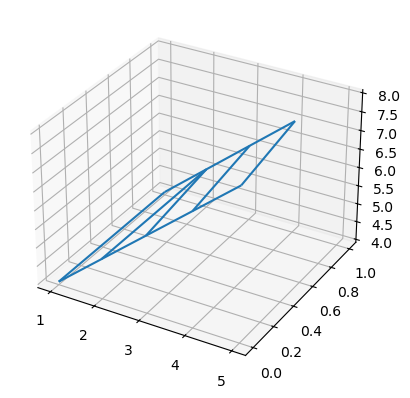

In [29]:

data = np.array(lst)
# Convert each 2D matrix into a Pandas DataFrame
dfs = [pd.DataFrame(x) for x in data]
# Create MultiIndex with 3 levels
indices = pd.MultiIndex.from_product([range(s) for s in data.shape])
# Concatenate all Pandas DataFrames into one large DataFrame
df_final = pd.concat(dfs, keys=indices)


fig = plt.figure()
X = np.array([lst[i][0] for i in range(len(lst))])
y = np.linspace(0,1,len(lst))
_,Y = np.meshgrid(X[0],y)
# lst = np.array([lst[i][1] for i in range(len(lst))])
lst = np.array([lst[i][1] for i in range(len(lst))])
ax = fig.add_subplot(1,1,1,projection = "3d")
ax.plot_wireframe(X,Y,lst,rcount = 15,ccount = 15) 
plt.show()

[[-5.  0.  5.]
 [-5.  0.  5.]] [[-5. -5. -5.]
 [ 5.  5.  5.]] [[ 0.70886129 -0.95892427  0.70886129]
 [ 0.70886129 -0.95892427  0.70886129]]


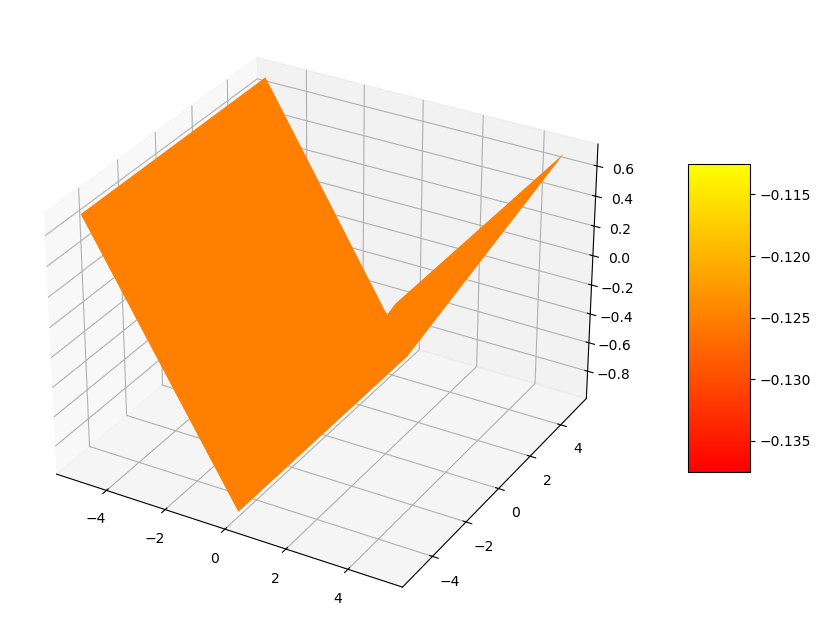

In [45]:
# ****************** 3d图中绘制曲面图 ******************
# 在3d坐标轴对象下使用plot_surface方法
from mpl_toolkits.mplot3d import axes3d # Axes3D写作axes3d也可以
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,1,1,projection = "3d")
x = np.linspace(-5,5,3)
y = np.linspace(-5,5,2)
X,Y = np.meshgrid(x,y) # X和Y需要是二维数组
Z = np.sin(np.sqrt(X**2+Y**2))
print(X,Y,Z)
surf = ax1.plot_surface(X, Y, Z, cmap=cm.autumn)
"""
其余参数：
rcount:为沿行方向绘制网格的数目
ccount:为沿列方向绘制网格的数目
cmap:设定配色板（可直接调用matplotlib.cm中的配色板，如autumn,autumn_r，coolwarm等等）
color:设定颜色

"""

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [9]:
import laser_measurement.measurement as measurement
port = '/dev/ttyUSB0'  # 串口设备路径

# 打开串口
ser = measurement.measure(port)

# 初始化激光器
ser.init_write()
ser.mode = "fast auto"
ser.write_serial()


OK


In [10]:
ser.stop_auto()

In [15]:
ser.write_serial()

In [14]:
ser.stop_auto()